In [54]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.

https://pypi.org/project/fix-yahoo-finance/0.1.30/

In [55]:
# Define the stock symbol and the date range
ticker = 'AAPL'
start_date = '2017-12-31'
end_date = '2023-09-30'

# Use yfinance to retrieve data from Yahoo Finance
aapl = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [56]:
aapl


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776520,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769424,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958790,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425125,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271259,82271200
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800


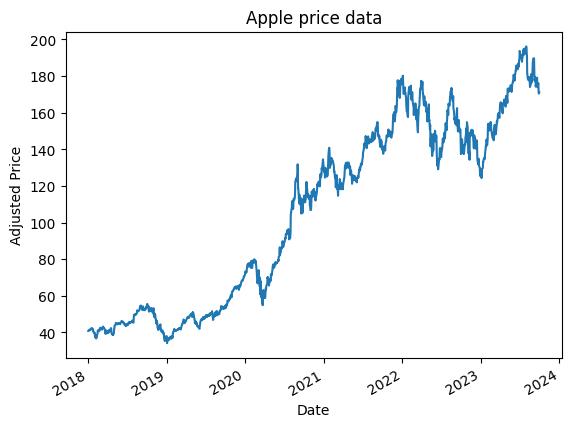

In [57]:
aapl["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Apple price data")
plt.show()


In [58]:
tickers = ["AAPL", "MSFT", "AMZN", "K", "O"]

prices = yf.download(tickers, start=start_date, end=end_date)


[*********************100%%**********************]  5 of 5 completed


In [59]:
prices["Adj Close"]


,AAPL,AMZN,K,MSFT,O
Date,,,,,
2018-01-02,40.776524,59.450500,51.297344,80.391846,42.469715
2018-01-03,40.769421,60.209999,51.055843,80.765984,42.357197
2018-01-04,40.958797,60.479500,51.870922,81.476845,41.442097
2018-01-05,41.425121,61.457001,52.029408,82.486984,41.412098
2018-01-08,41.271259,62.343498,52.202991,82.571175,41.464596
...,...,...,...,...,...
2023-09-25,176.080002,131.270004,55.859154,317.540009,50.925900
2023-09-26,171.960007,125.980003,55.568073,312.140015,50.000698
2023-09-27,170.429993,125.980003,55.511738,312.790009,49.403793


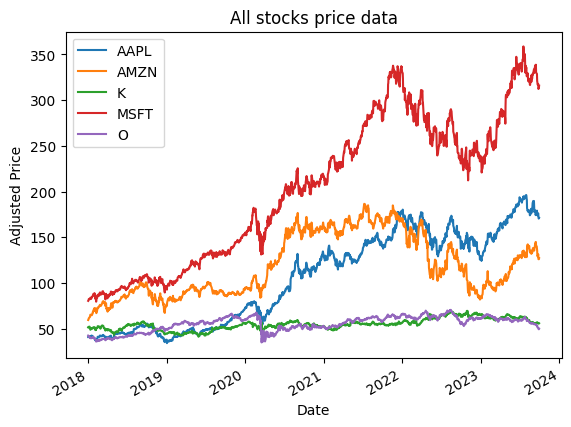

In [60]:
prices["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("All stocks price data")
plt.show()


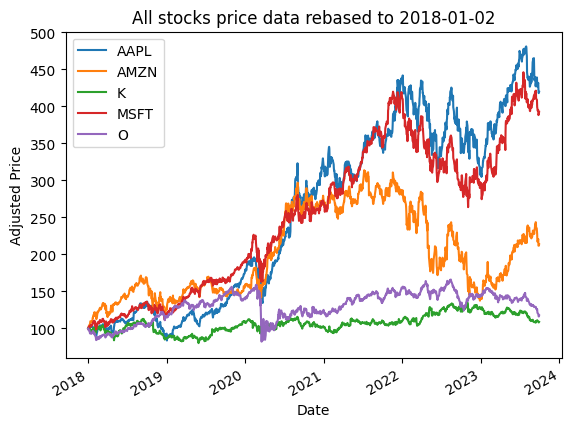

In [68]:
# rebase the time series of adjusted close to start at 100 on 2019-12-31 and plot the results
prices_rebased = prices["Adj Close"] / prices["Adj Close"].iloc[0] * 100
# prices_rebased = prices["Adj Close"] / prices["Adj Close"].loc["2017-12-31"] * 100
# prices_rebased = prices["Adj Close"].div(prices["Adj Close"].iloc[0]).mul(100)
# an alternative pandas formula to rebase prices is to use the .rebase() method
# prices_rebased = prices["Adj Close"].rebase(start_date=prices.index[0], start_value=100)
# prices_rebased = prices["Adj Close"].rebase(start_date="2019-12-31", start_value=100)

prices_rebased.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
# plt.title("All stocks price data rebased")
# an alternative way with fstring and the starting date but without time
plt.title(f"All stocks price data rebased to {prices.index[0].date()}")
plt.show()


In [69]:
# calculate the monthly returns of the adjusted close prices
# from daily data to monthly data
prices_monthly = prices["Adj Close"].resample("M").last()
returns_monthly = prices_monthly.pct_change().dropna()
returns_yearly = prices["Adj Close"].resample("Y").last().pct_change().dropna()
# returns_yearly in percent with one digit after the decimal point and the percent symbol
returns_yearly.mul(100).round(1).astype(str) + "%"


,AAPL,AMZN,K,MSFT,O
Date,,,,,
2019-12-31,89.0%,23.0%,26.4%,57.6%,21.3%
2020-12-31,82.3%,76.3%,-6.6%,42.5%,-11.6%
2021-12-31,34.6%,2.4%,7.7%,52.5%,24.0%
2022-12-31,-26.4%,-49.6%,14.6%,-28.0%,-7.4%
2023-12-31,32.3%,51.3%,-14.0%,32.6%,-18.2%


In [70]:
# calculate the annualized average return and volatility
# from monthly to yearly
returns_annualized = returns_monthly.mean() * 12
volatility_annualized = returns_monthly.std() * np.sqrt(12)
# calculate the annualized compound return
# from monthly to yearly
returns_compounded = (returns_monthly + 1).prod() ** (12 / len(returns_monthly)) - 1
# table with the tree statistics for the five stocks
returns_table = pd.concat([returns_annualized, returns_compounded, volatility_annualized], axis=1)
returns_table.columns = ["Annualized average return", "Annualized compounded return", "Annualized volatility"]
# display the table with percent figures and one digit after the decimal point
returns_table.mul(100).round(1).astype(str) + "%"


,Annualized average return,Annualized compounded return,Annualized volatility
AAPL,30.9%,29.5%,31.5%
AMZN,15.3%,10.4%,33.3%
K,3.1%,1.5%,18.0%
MSFT,24.8%,25.1%,21.3%
O,6.8%,4.0%,23.3%


In [71]:
# calculate the correlation matrix of the monthly returns
# from daily to monthly
correlation_matrix = returns_monthly.corr()
# display the correlation matrix with two digits after the decimal point
correlation_matrix.style.format(precision=2).background_gradient(cmap="coolwarm", axis=None,)


,AAPL,AMZN,K,MSFT,O
AAPL,1.00,0.67,0.45,0.69,0.43
AMZN,0.67,1.00,0.22,0.69,0.29
K,0.45,0.22,1.00,0.26,0.27
MSFT,0.69,0.69,0.26,1.00,0.44
O,0.43,0.29,0.27,0.44,1.00


In [72]:
# calculate the sharpes ratio of amazon

# calculate the sharpe ratio of amazon
# from daily to monthly
sharpe_ratio = returns_monthly.mean() / returns_monthly.std() * np.sqrt(12)
# display the sharpe ratio with two digits after the decimal point
sharpe_ratio.mul(100).round(2).astype(str) + "%"
# by computing the excess returns and the excess volatility
# from daily to monthly
excess_returns = returns_monthly.sub(returns_monthly["O"], axis=0)
# display the excess returns with two digits after the decimal point
excess_returns.mul(100).round(2).astype(str) + "%"
# from daily to monthly
excess_volatility = excess_returns.std() * np.sqrt(12)
# display the excess volatility with two digits after the decimal point
excess_volatility.mul(100).round(2).astype(str) + "%"
# from daily to monthly
sharpe_ratio = excess_returns.mean() / excess_volatility
# display the sharpe ratio with two digits after the decimal point
sharpe_ratio.mul(100).round(2).astype(str) + "%"


AAPL     6.69%
AMZN     2.05%
K       -1.23%
MSFT     6.34%
O         nan%
dtype: object

In [79]:
# give me the data for US t-bill 3 month
# from daily to monthly
risk_free_rate = 0.01 / 12
# from daily to monthly
excess_returns = returns_monthly.sub(risk_free_rate, axis=0)
# from daily to monthly
#compare the returns and the excess returns in a table
returns_table = pd.concat([returns_monthly, excess_returns], axis=1)



,AAPL,AMZN,K,MSFT,O,AAPL,AMZN,K,MSFT,O
Date,,,,,,,,,,
2018-02-28,0.068185,0.042429,-0.028043,-0.008415,-0.071270,0.067352,0.041596,-0.028876,-0.009249,-0.072104
2018-03-31,-0.058051,-0.043049,-0.009462,-0.026661,0.056341,-0.058884,-0.043883,-0.010295,-0.027494,0.055507
2018-04-30,-0.015020,0.082075,-0.093986,0.024652,-0.019391,-0.015853,0.081241,-0.094819,0.023819,-0.020225
2018-05-31,0.135124,0.040539,0.102823,0.061467,0.059575,0.134291,0.039706,0.101989,0.060634,0.058742
2018-06-30,-0.009418,0.043065,0.085107,-0.002327,0.013299,-0.010252,0.042232,0.084273,-0.003160,0.012465
...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.046058,0.143480,-0.033857,0.071105,-0.049994,0.045225,0.142647,-0.034690,0.070272,-0.050828
2023-06-30,0.094330,0.081108,0.009435,0.036999,0.010183,0.093497,0.080275,0.008602,0.036165,0.009349
2023-07-31,0.012785,0.025468,-0.007567,-0.013567,0.024000,0.011952,0.024635,-0.008400,-0.014400,0.023167
